In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append("../")

from tqdm import tqdm_notebook
from src import Nesterov, SimpleMuFunc


In [3]:
class SimpleMuEnemy(SimpleMuFunc):
    def estimation_grad(self, x, direction_point, x_star):
        g = self.grad(x)
        size = self.alpha * np.linalg.norm(g)
        diff = direction_point - x_star
        noise = diff / np.linalg.norm(diff) * size
        est = g - noise
        return est

In [9]:
def plot(iters: int = 100, alpha = 0):
    mu = 0.1
    L = 1000
    start = np.ones(2) * 100
    start = np.array([0, 100])
    simple = SimpleMuEnemy(L=L, mu=mu, alpha=alpha)
    heavy = Nesterov(start=start, L=L, mu=mu / 2, func=simple)
    nesterov_true = SimpleMuEnemy(L=L, mu=mu, alpha=0)
    heavy_true = Nesterov(start=start, L=L, mu=mu / 2, func=nesterov_true)

    for _ in tqdm_notebook(range(iters)):
        heavy.step()
        heavy_true.step()
    with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
        plt.figure(figsize=(10, 6), dpi=120)
        xs = heavy.history
        xst = heavy_true.history
        values = [simple(x) for x in xs]
        plt.plot(np.arange(len(xs)), values, label="Noise")
        plt.plot(np.arange(len(xs)), [simple(x) for x in xst], label="Real")
        plt.legend()
        plt.show()
    return xs

Step 0.001, ak 0.007071067811865475, mu 0.05, L 1000, m 1, s 1, u step 0.1414213562373095
Step 0.001, ak 0.007071067811865475, mu 0.05, L 1000, m 1, s 1, u step 0.1414213562373095


/tmp/ipykernel_82649/3755922305.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(iters)):


  0%|          | 0/100 [00:00<?, ?it/s]

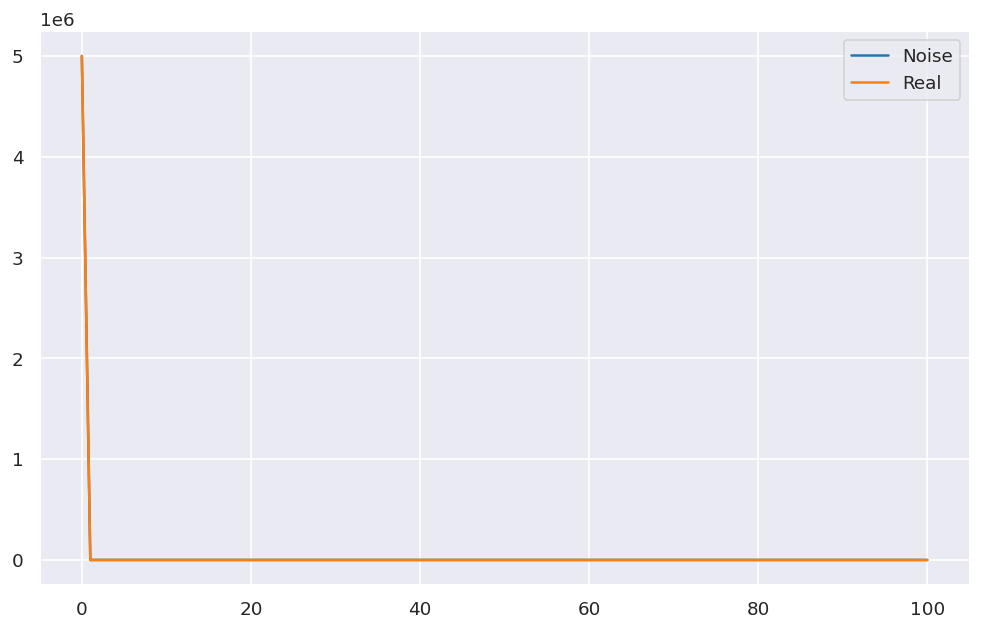

In [11]:
_ = plot(100, alpha=0)

Step 0.002530859105800061, ak 9.559616766519065e-06, mu 0.05, L 1000, m 0.3999999999999999, s 1.7800000000000002, u step 0.0001911923353303813
Step 0.001, ak 0.007071067811865475, mu 0.05, L 1000, m 1, s 1, u step 0.1414213562373095


/tmp/ipykernel_82649/3755922305.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(iters)):


  0%|          | 0/100 [00:00<?, ?it/s]

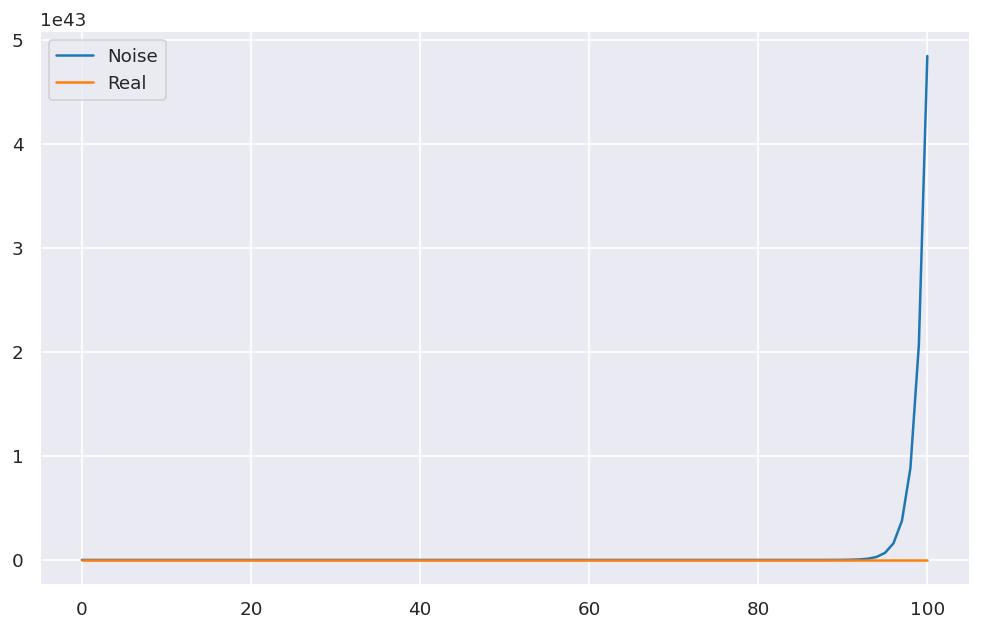

In [13]:
_ = plot(100, alpha=0.3)